# Tugas Kecil 2 IF3170 Inteligensi Buatan
### Exploratory Data Analysis
### Author
- Muhammad Hanan / 13521041
- Vieri Fajar Firdaus / 13521099


### Inisialisasi library dan data


In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

data_train = pd.read_csv('data/data_train.csv')
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0


In [372]:
numerik=[1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1]

### Pertanyaan
- Lakukan analisis data latih terhadap hal berikut. Insight apa yang kalian dapatkan?
- Statistik dasar (mean, min, max, dll)
- Duplicate value
- Missing value
- Outlier untuk kolom numerik: distribusi data (plot dan analisis kurtosis)
- Outlier untuk kolom non numerik: bar chart
- Korelasi dengan kolom target

## Deskripsi Data

Menuliskan deskripsi statistika (_descriptive statistics_) dari semua kolom dada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR (_interquartile range_), _skewness_, dan _kurtosis_.

## Deskripsi Kolom

1. battery_power: Total energi baterai dalam satu waktu diukur dalam mAh
2. blue: Memiliki bluetooth atau tidak
3. clock_speed: Kecepatan mikroprosesor menjalankan instruksi
4. dual_sim: Memiliki dukungan dual sim atau tidak
5. fc: Resolusi kamera depan dalam megapiksel
6. four_g: Memiliki 4G atau tidak
7. int_memory: Memori internal dalam gigabyte
8. m_dep: Ketebalan ponsel dalam cm
9. mobile_wt: Berat ponsel
10. n_cores: Jumlah core prosesor
11. pc: Resolusi kamera utama dalam megapiksel
12. px_height: Tinggi resolusi piksel
13. px_width: Lebar resolusi piksel
14. ram: Ukuran RAM dalam megabyte
15. sc_h: Tinggi layar ponsel dalam cm
16. sc_w: Lebar layar ponsel dalam cm
17. talk_time: Waktu telepon maksimum dalam satu kali pengisian baterai
18. three_g: Memiliki 3G atau tidak
19. touch_screen: Memiliki layar sentuh atau tidak
20. wifi: Memiliki wifi atau tidak
21. price_range (target): Rentang harga dengan nilai 0 (biaya rendah), 1 (biaya sedang), 2 (biaya tinggi) atau 3 (biaya sangat tinggi).


**Tipe data setiap kolom**

In [373]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   blue           1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_sc

**Deskripsi dari setiap kolom**

In [374]:
kuantitatif=data_train[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time"]]

In [375]:
modus = {}
for i in kuantitatif.columns:
    mode = ''
    first = True
    for j in kuantitatif[i].mode():
        if first:
            mode = mode + str(j)
            first = False
        else:
            mode = mode + ', ' + str(j)
    modus[i] = mode


**Deskripsi untuk Data Kuantitatif**

In [376]:
df = pd.DataFrame()
kuantitatif=data_train[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time"]]
df['Mean'] = kuantitatif.mean()
df['Median'] = kuantitatif.median()
df['Modus'] = modus
df['Standar Deviasi'] = kuantitatif.std()
df['Variasi'] = kuantitatif.var()
df['Range'] = kuantitatif.max()-kuantitatif.min()
df['Kuartil 1'] = kuantitatif.quantile(0.25)
df['Kuartil 2'] = kuantitatif.quantile(0.5)
df['Kuartil 3'] = kuantitatif.quantile(0.75)
df['IQR'] = df['Kuartil 3']-df['Kuartil 1']
df['Skewness'] = kuantitatif.skew()
df['Kurtosis'] = kuantitatif.kurtosis()
df

,Mean,Median,Modus,Standar Deviasi,Variasi,Range,Kuartil 1,Kuartil 2,Kuartil 3,IQR,Skewness,Kurtosis
battery_power,1237.145714,1219.0,"772, 1068, 1330, 1872, 1949",430.051785,1.849445e+05,1497.0,864.75,1219.0,1602.00,737.25,0.041901,-1.168068
clock_speed,1.521714,1.5,0.5,0.814723,6.637740e-01,2.5,0.70,1.5,2.20,1.50,0.166399,-1.329523
fc,4.275000,3.0,0,4.324170,1.869845e+01,19.0,1.00,3.0,7.00,6.00,1.020324,0.293404
int_memory,31.962143,32.0,27,18.162970,3.298935e+02,62.0,16.00,32.0,48.00,32.00,0.063166,-1.227200
m_dep,0.507857,0.5,0.1,0.288539,8.325488e-02,0.9,0.20,0.5,0.80,0.60,0.059116,-1.266823
mobile_wt,139.375714,139.0,182,35.400803,1.253217e+03,120.0,108.00,139.0,169.00,61.00,0.020013,-1.210202
n_cores,4.481429,4.0,4,2.279836,5.197653e+00,7.0,2.00,4.0,7.00,5.00,0.019913,-1.232209
pc,9.917143,10.0,10,6.080023,3.696668e+01,20.0,5.00,10.0,15.00,10.00,0.028708,-1.163876
px_height,643.177857,561.0,"88, 347, 526",444.628980,1.976949e+05,1960.0,273.75,561.0,950.25,676.50,0.659456,-0.316229
px_width,1251.717143,1247.0,1247,428.982850,1.840263e+05,1498.0,876.50,1247.0,1627.50,751.00,0.004023,-1.176025


**Deskripsi untuk Data Nominal**

In [377]:
nominal=data_train[["blue","dual_sim","four_g","three_g","touch_screen","wifi"]]

In [378]:
modus = {}
for i in nominal.columns:
    mode = ''
    first = True
    for j in nominal[i].mode():
        if first:
            mode = mode + str(j)
            first = False
        else:
            mode = mode + ', ' + str(j)
    modus[i] = mode


In [379]:
df = pd.DataFrame()
df['Modus'] = modus
frekuensi_nol={}
frekuensi_satu={}
for i in nominal.columns:
    frekuensi_nol[i] = 0
    frekuensi_satu[i] = 0
    for j in nominal[i]:
        if j == 0:
            frekuensi_nol[i] += 1
        else:
            frekuensi_satu[i] += 1
persentase_nol={}
persentase_satu={}
for i in nominal.columns:
    persentase_nol[i] = frekuensi_nol[i]/len(nominal[i])
    persentase_satu[i] = frekuensi_satu[i]/len(nominal[i])

df['Frekuensi 0'] = frekuensi_nol
df['Frekuensi 1'] = frekuensi_satu
df['Persentase 0'] = persentase_nol
df['Persentase 1'] = persentase_satu
df

,Modus,Frekuensi 0,Frekuensi 1,Persentase 0,Persentase 1
blue,0,709,691,0.506429,0.493571
dual_sim,1,696,704,0.497143,0.502857
four_g,1,658,742,0.470000,0.530000
three_g,1,335,1065,0.239286,0.760714
touch_screen,0,715,685,0.510714,0.489286
wifi,0,707,693,0.505000,0.495000


**Deskripsi untuk Data Ordinal**

In [380]:
ordinal=data_train["price_range"]
df=pd.DataFrame()
df['Modus'] = ordinal.mode()
df['Median'] = ordinal.median()
df['Q1'] = ordinal.quantile(0.25)
df['Q3'] = ordinal.quantile(0.75)
df['IQR'] = df['Q3']-df['Q1']
df=df.T
df.rename(columns={0:'Price Range'}, inplace=True)
df

,Price Range
Modus,0.0
Median,1.0
Q1,0.0
Q3,2.0
IQR,2.0


## Duplicate Value


Duplicate value atau nilai ganda merujuk pada keberadaan data yang sama atau identik pada suatu set data. Dalam konteks pengolahan data atau database, duplicate value dapat terjadi pada satu atau lebih entitas (baris atau rekord) dalam suatu kumpulan data.


In [381]:
def check_duplicate_values(data):
    duplicate_rows = data[data.duplicated()]

    if duplicate_rows.shape[0] == 0:
        print("Tidak terdapat duplicate value")
    else:
        print("Terdapat duplicate value")
        print(duplicate_rows)

check_duplicate_values(df)

Terdapat duplicate value
     Price Range
Q1           0.0
IQR          2.0


## Missing Value
Missing value, atau nilai yang hilang, merujuk pada situasi di mana nilai atau data yang seharusnya ada dalam suatu set data tidak tersedia atau tidak terisi. Kondisi ini umumnya terjadi karena beberapa alasan dan dapat memiliki dampak yang signifikan pada analisis data dan pengambilan keputusan.

In [382]:
def check_missing_values(data):
    missing_values = data.isnull().sum()

    if missing_values.sum() == 0:
        print("Tidak terdapat missing values")
    else:
        print("Terdapat missing values: ")
        for column, count in missing_values.items():
            if count > 0:
                print(f"{column}: {count} missing values")

check_missing_values(data_train)

Tidak terdapat missing values


## Outlier
Outlier adalah nilai atau observasi yang secara signifikan berbeda dari sebagian besar data dalam suatu set. Outlier dapat mempengaruhi analisis statistik dan model prediktif, dan dapat muncul sebagai hasil dari kesalahan pengukuran, kejadian yang tidak biasa, atau karakteristik alami dari data yang diamati

In [383]:
def box_plot_outliers(df: pd.DataFrame, column: str) -> None:
    fig, ax1 = plt.subplots(figsize=(10, 5))
    g1 = sns.boxplot(data=df, x=column, ax=ax1, color="#03C988", flierprops={
                     "marker": 'o', "markersize": 5, "markeredgecolor": 'black', "markerfacecolor": 'white', "alpha": 0.6})
    g1.set(xlabel=None)
    g1.set(ylabel=None)
    fig.suptitle(column, y=0.95, fontsize=17)

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()

    print(f"Jumlah outlier dalam kolom {column}: {outlier_count}")

#### Kolom battery_power

Jumlah outlier dalam kolom battery_power: 0


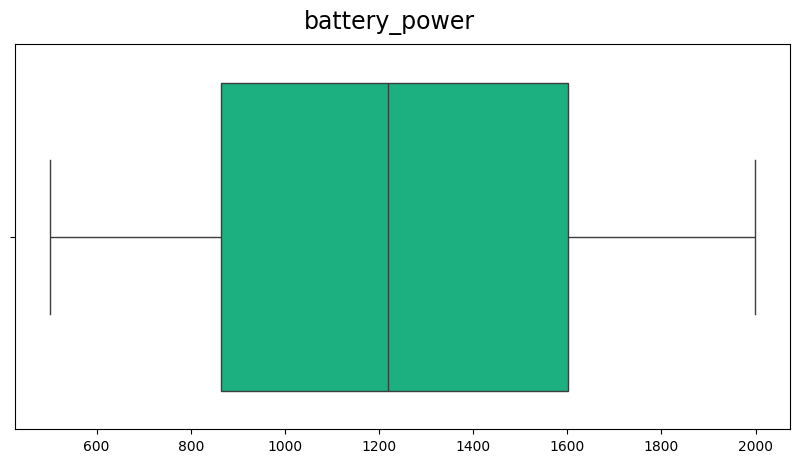

In [384]:
box_plot_outliers(data_train,data_train.columns[0])

Berdasarkan hasil analisis melalui box plot, data dalam kolom tersebut menunjukkan variasi yang signifikan antara nilai minimum dan maksimum, mencerminkan sebaran data yang cukup luas. Lebih penting lagi, tidak ditemukan adanya outlier yang memiliki nilai lebih rendah atau lebih tinggi dari batas minimum atau maksimum, menunjukkan bahwa data dalam kolom tersebut tampaknya homogen dan konsisten. Hal ini menunjukkan bahwa mayoritas data berada dalam kisaran antara kuartil pertama dan kuartil ketiga, dengan median sebagai nilai tengahnya, yang memberikan gambaran yang cukup representatif tentang distribusi data.

#### Kolom clock_speed

Jumlah outlier dalam kolom clock_speed: 0


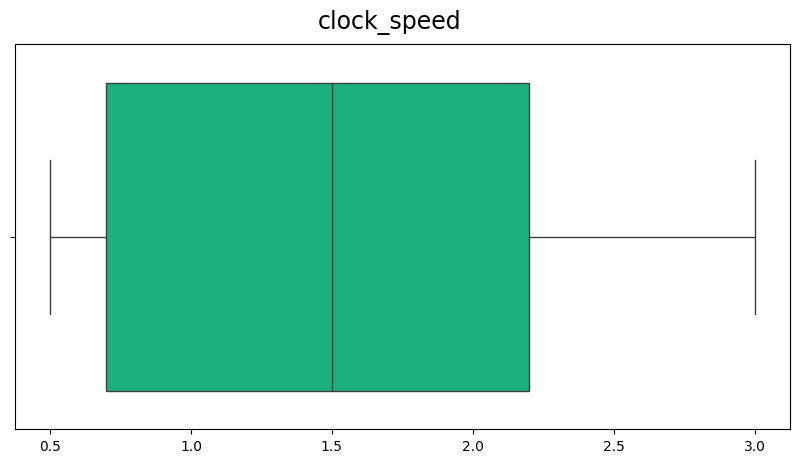

In [385]:
box_plot_outliers(data_train,data_train.columns[2])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup kecil dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom fc

Jumlah outlier dalam kolom fc: 11


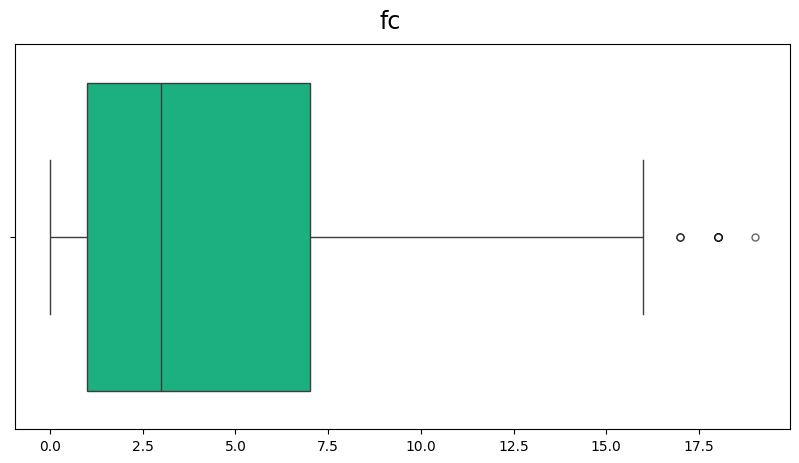

In [386]:
box_plot_outliers(data_train,data_train.columns[4])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup kecil dan terdapat beberapa outliers yang memiliki nilai yang lebih besar dari titik maksimum.

#### Kolom int_memory

Jumlah outlier dalam kolom int_memory: 0


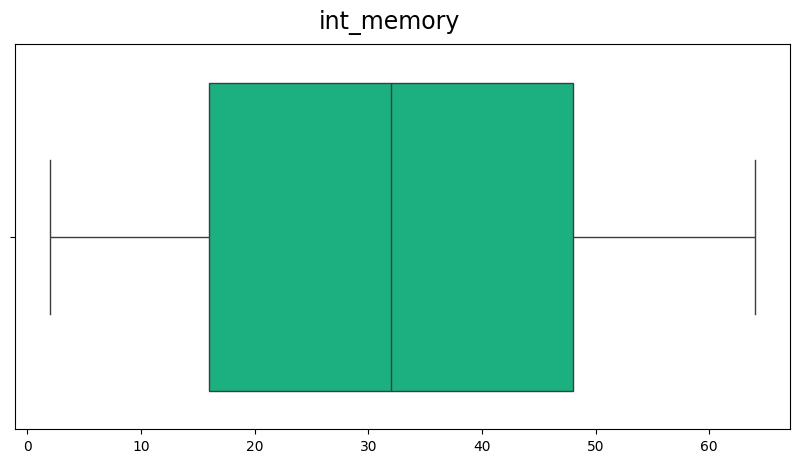

In [387]:
box_plot_outliers(data_train,data_train.columns[6])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom m_dep

Jumlah outlier dalam kolom m_dep: 0


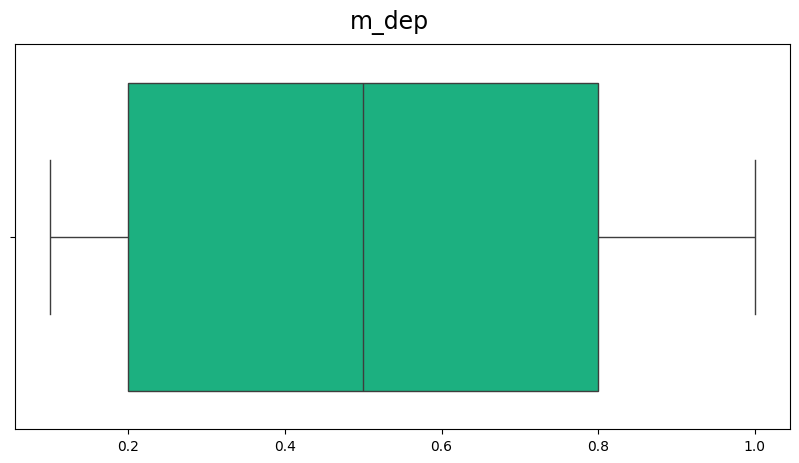

In [388]:
box_plot_outliers(data_train,data_train.columns[7])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup kecil dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom mobile_wt

Jumlah outlier dalam kolom mobile_wt: 0


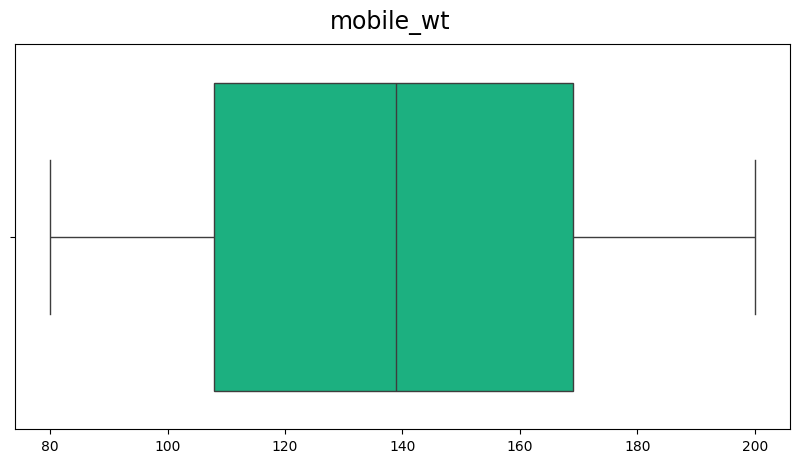

In [389]:
box_plot_outliers(data_train,data_train.columns[8])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum lumayan besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom n_cores

Jumlah outlier dalam kolom n_cores: 0

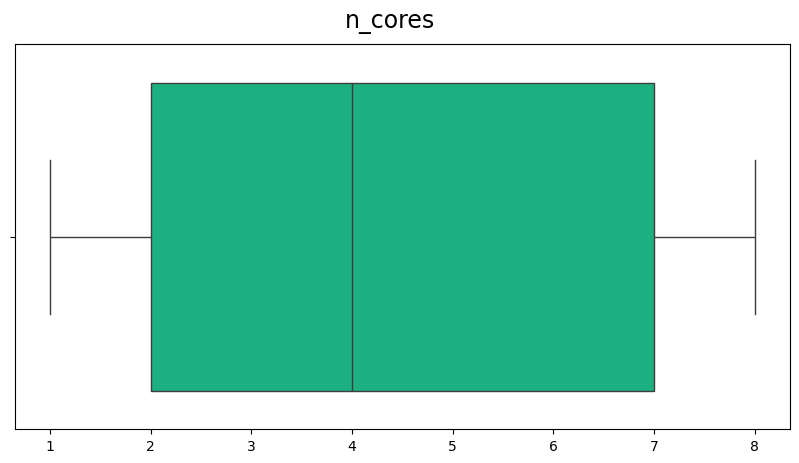

In [390]:
box_plot_outliers(data_train,data_train.columns[9])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom pc

Jumlah outlier dalam kolom pc: 0


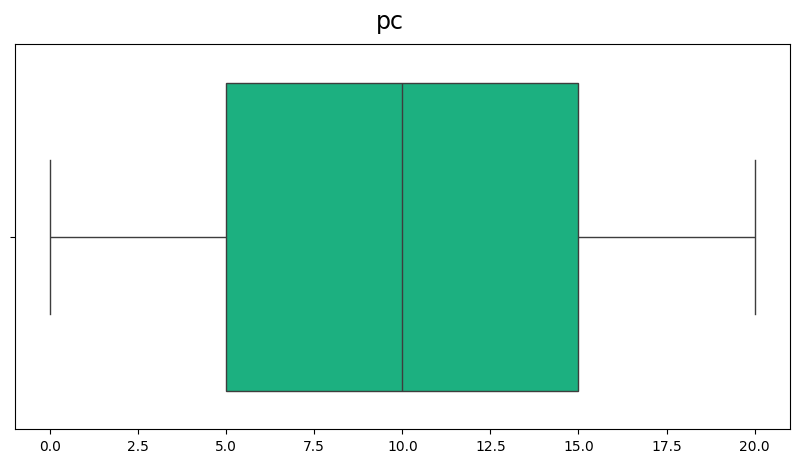

In [391]:
box_plot_outliers(data_train,data_train.columns[10])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom px_height

Jumlah outlier dalam kolom px_height: 0


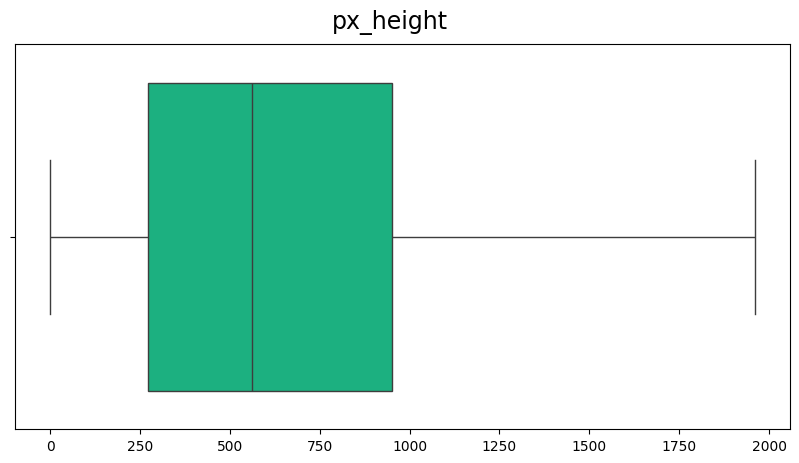

In [392]:
box_plot_outliers(data_train,data_train.columns[11])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom px_width

Jumlah outlier dalam kolom px_width: 0


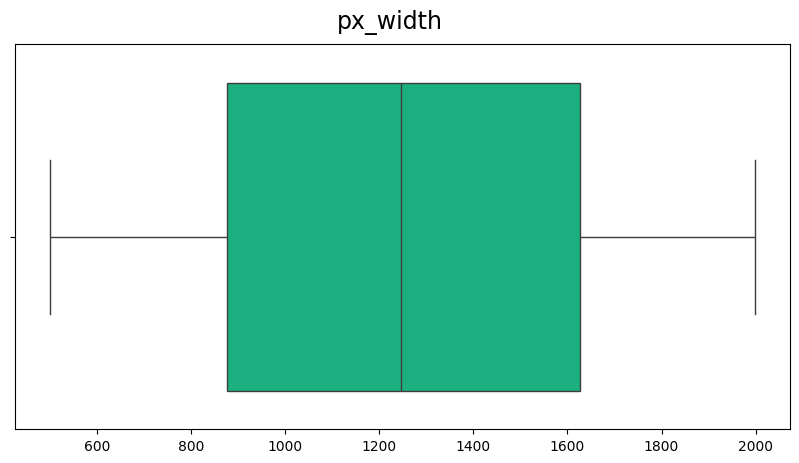

In [393]:
box_plot_outliers(data_train,data_train.columns[12])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### kolom ram

Jumlah outlier dalam kolom ram: 0


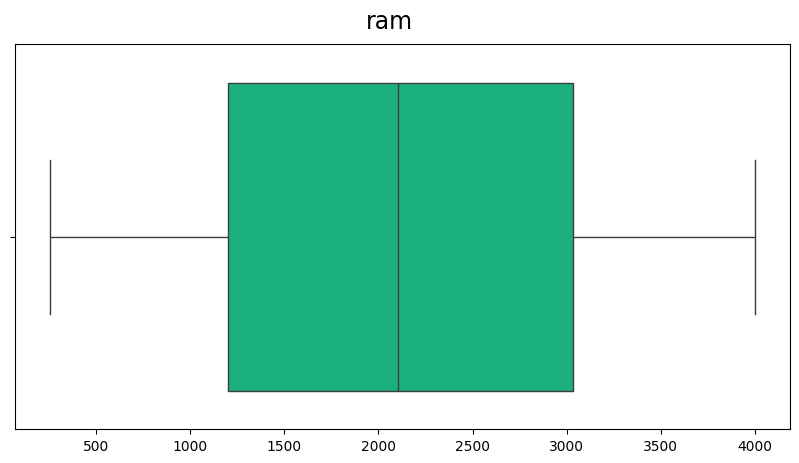

In [394]:
box_plot_outliers(data_train,data_train.columns[13])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum cukup besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom cs_h

Jumlah outlier dalam kolom sc_h: 0


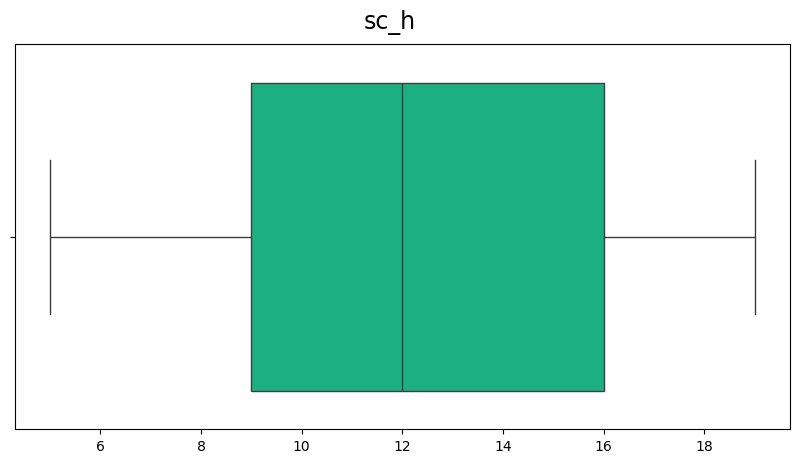

In [395]:
box_plot_outliers(data_train,data_train.columns[14])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom sc_w

Jumlah outlier dalam kolom sc_w: 0


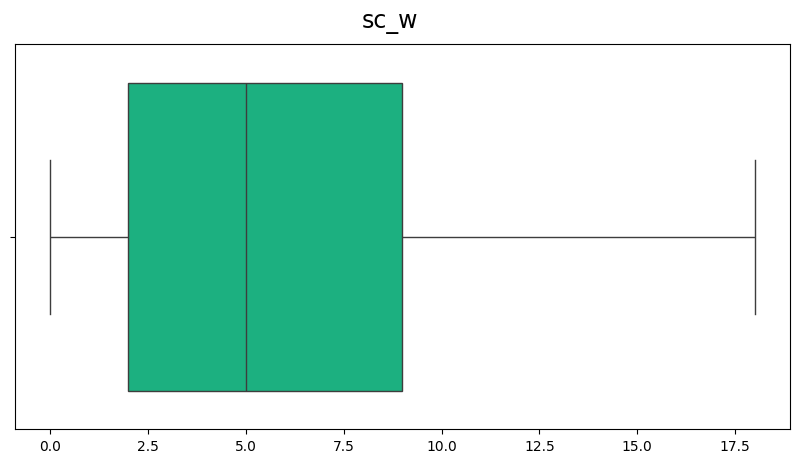

In [396]:
box_plot_outliers(data_train,data_train.columns[15])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

#### Kolom talk_time

Jumlah outlier dalam kolom talk_time: 0


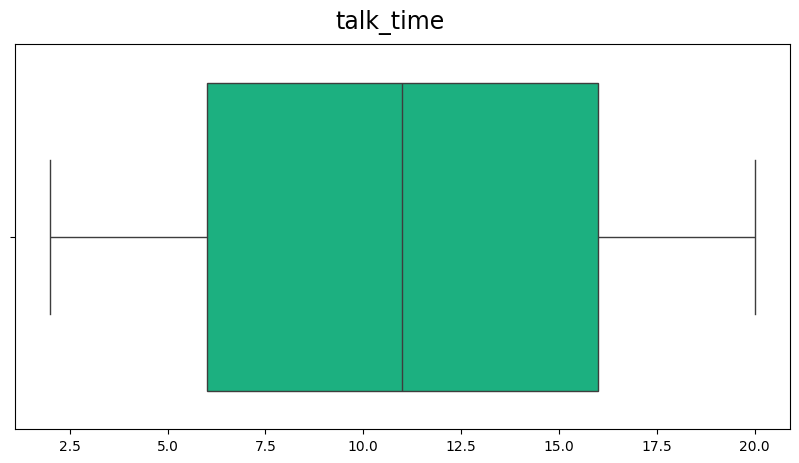

In [397]:
box_plot_outliers(data_train,data_train.columns[16])

Bedasarkan boxplot yang terbentuk, dapat diamati bahwa rentang antara titik minimum dan maximum tidak terlalu besar dan tidak terdapat outliers yang memiliki nilai yang lebih kecil atau memiliki nilai yang lebih besar dari titik maksimum atau minimum.

## Kolom numerik: distribusi data (plot dan analisis kurtosis)
Outlier adalah nilai atau observasi yang secara signifikan berbeda dari sebagian besar data dalam suatu set. Outlier dapat mempengaruhi analisis statistik dan model prediktif, dan dapat muncul sebagai hasil dari kesalahan pengukuran, kejadian yang tidak biasa, atau karakteristik alami dari data yang diamati

In [398]:
def data_numerik(column):
    kurtosis = data_train[column].kurtosis()
    if(abs(kurtosis)<1):
        print("Data berdistribusi normal")
    else:
        print("Data tidak berdistribusi normal")

    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharex=True)
    g1 = sns.histplot(data=data_train, x=column, ax=ax1, color="#03c9c9",
                      kde=True, line_kws={"linewidth": 1.5, "alpha": 1})
    g1.lines[0].set_color('#c91703')
    g1.set(ylabel=None)
    g1.set(xlabel=None)
    fig.suptitle(f"Plot data untuk atribut {column}", y=1, fontsize=17)


Data tidak berdistribusi normal


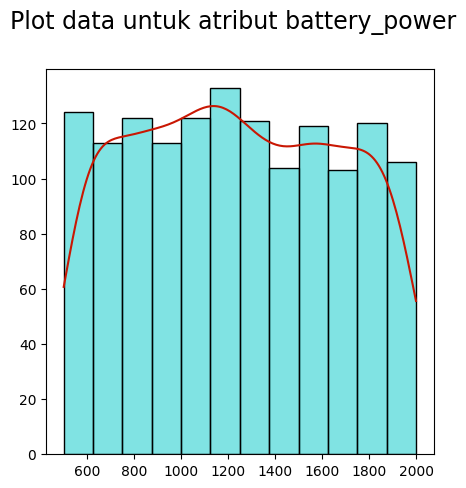

In [399]:
data_numerik("battery_power")

Data tidak berdistribusi normal


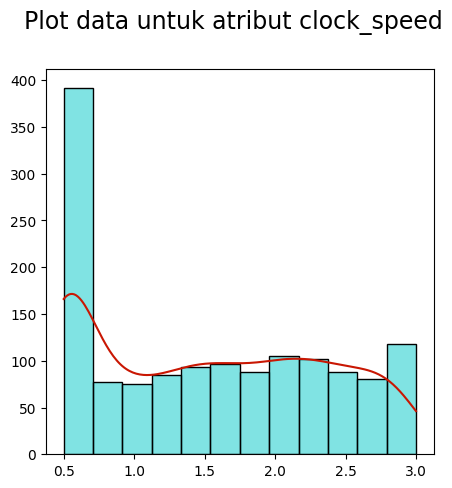

In [400]:
data_numerik("clock_speed")

Data berdistribusi normal


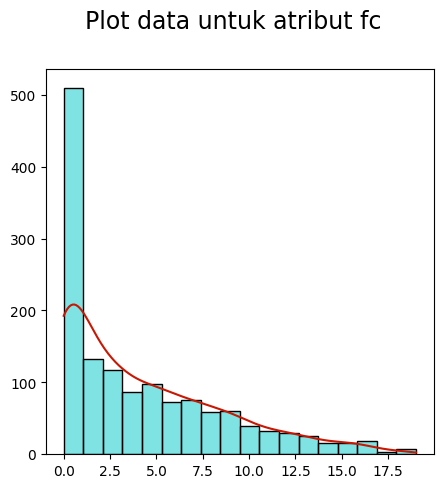

In [401]:
data_numerik("fc")

Data tidak berdistribusi normal


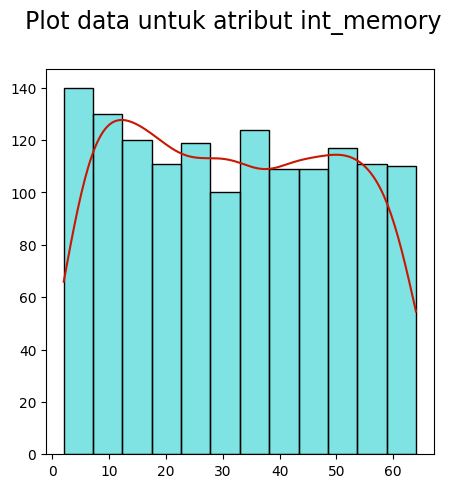

In [402]:
data_numerik("int_memory")

Data tidak berdistribusi normal


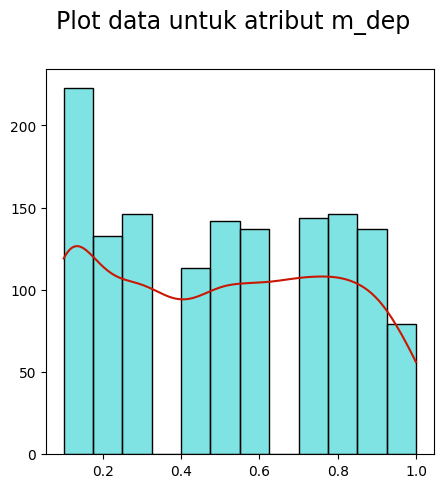

In [403]:
data_numerik("m_dep")

Data tidak berdistribusi normal


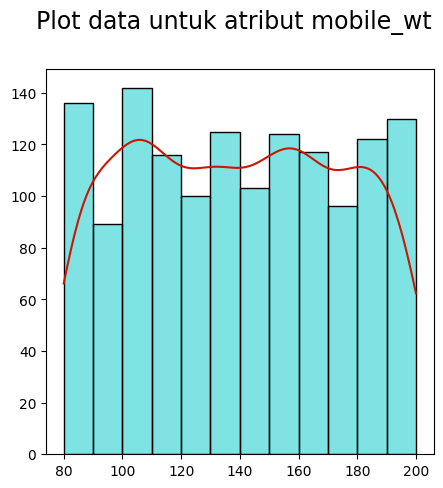

In [404]:
data_numerik("mobile_wt")

Data tidak berdistribusi normal


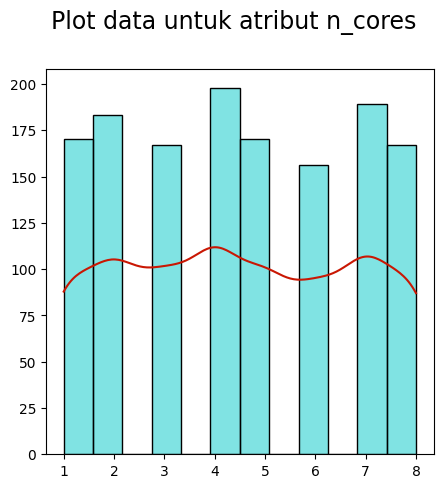

In [405]:
data_numerik("n_cores")

Data tidak berdistribusi normal


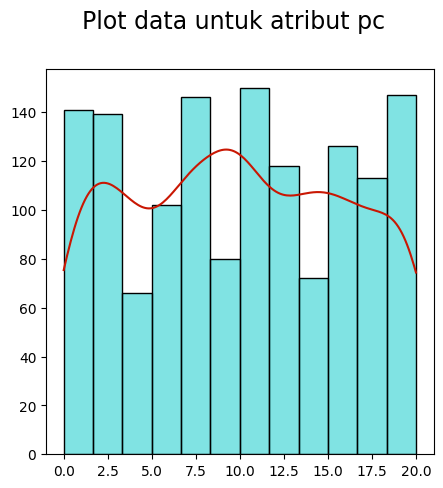

In [406]:
data_numerik("pc")

Data berdistribusi normal


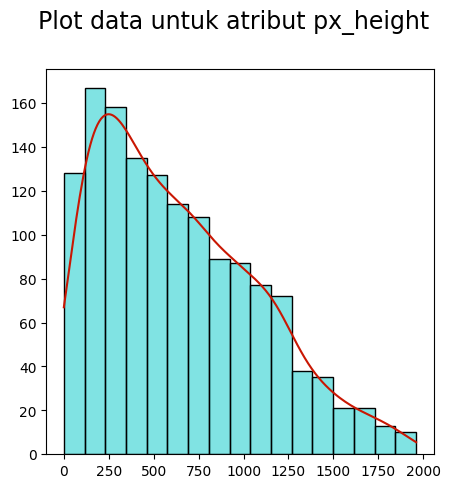

In [407]:
data_numerik("px_height")

Data tidak berdistribusi normal


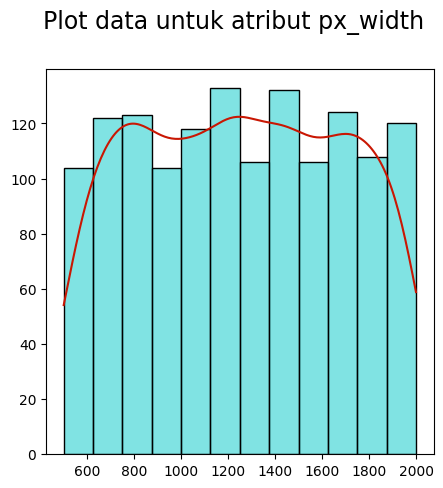

In [408]:
data_numerik("px_width")

Data tidak berdistribusi normal


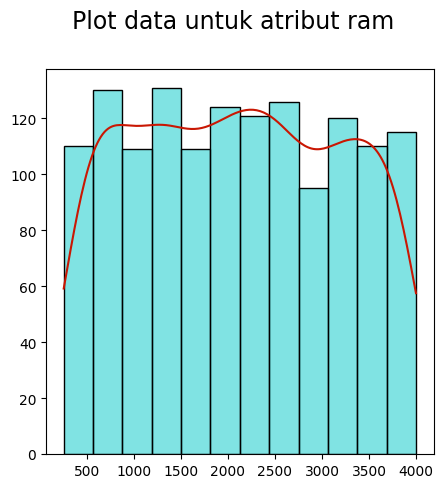

In [409]:
data_numerik("ram")

Data tidak berdistribusi normal


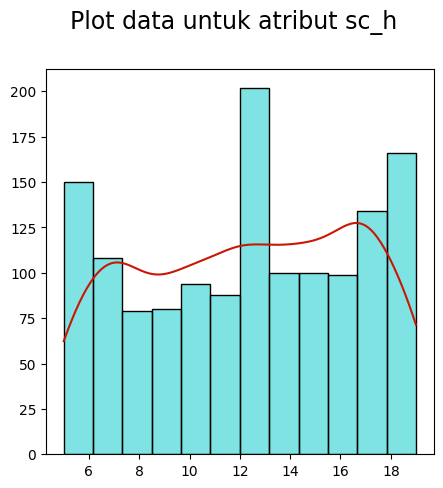

In [410]:
data_numerik("sc_h")

Data berdistribusi normal


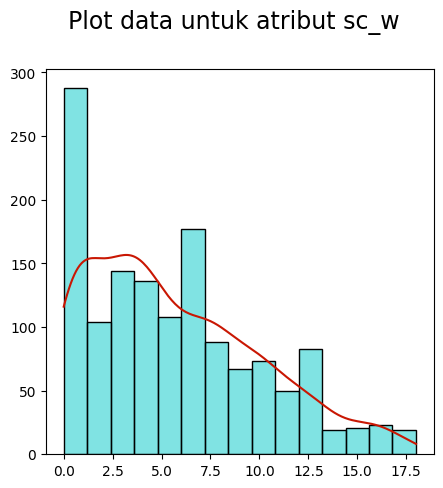

In [411]:
data_numerik("sc_w")

Data tidak berdistribusi normal


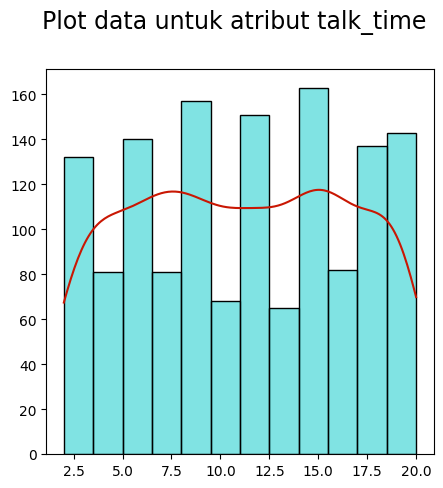

In [412]:
data_numerik("talk_time")

## Kolom non numerik: bar chart
Outlier adalah nilai atau observasi yang secara signifikan berbeda dari sebagian besar data dalam suatu set. Outlier dapat mempengaruhi analisis statistik dan model prediktif, dan dapat muncul sebagai hasil dari kesalahan pengukuran, kejadian yang tidak biasa, atau karakteristik alami dari data yang diamati

In [413]:
def data_non_numerik(column):
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    g1 = sns.countplot(data=data_train, x=column, color="#03c9c9")
    g1.set_ylabel(None)
    g1.set_xlabel(None)
    fig.suptitle(f"Count Plot for {column}", y=1, fontsize=17)

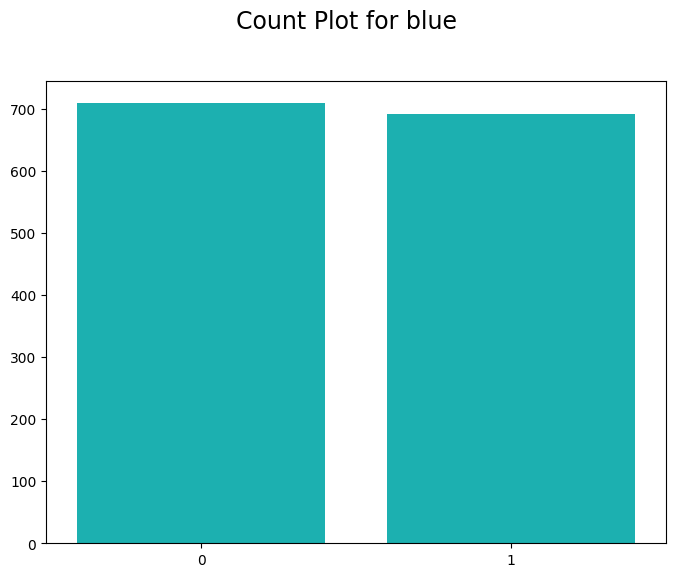

In [414]:
data_non_numerik("blue")

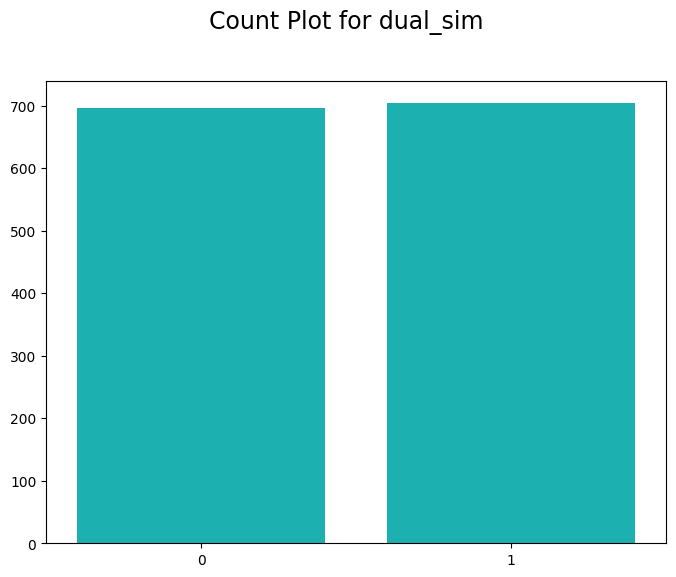

In [415]:
data_non_numerik("dual_sim")

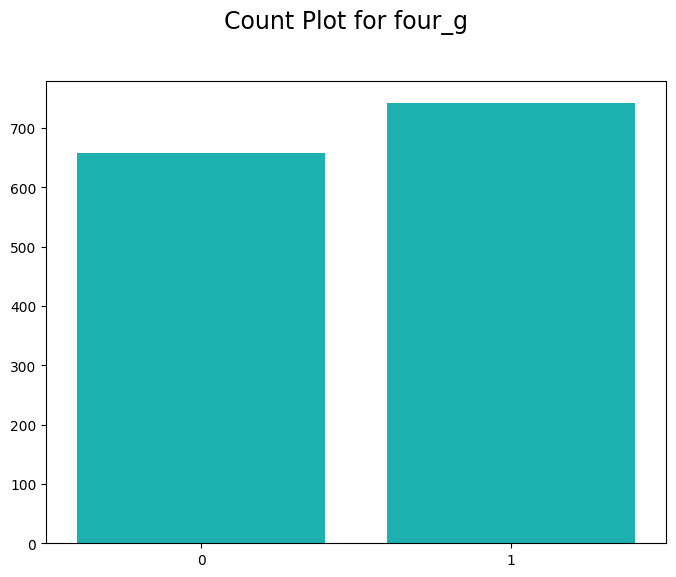

In [416]:
data_non_numerik("four_g")

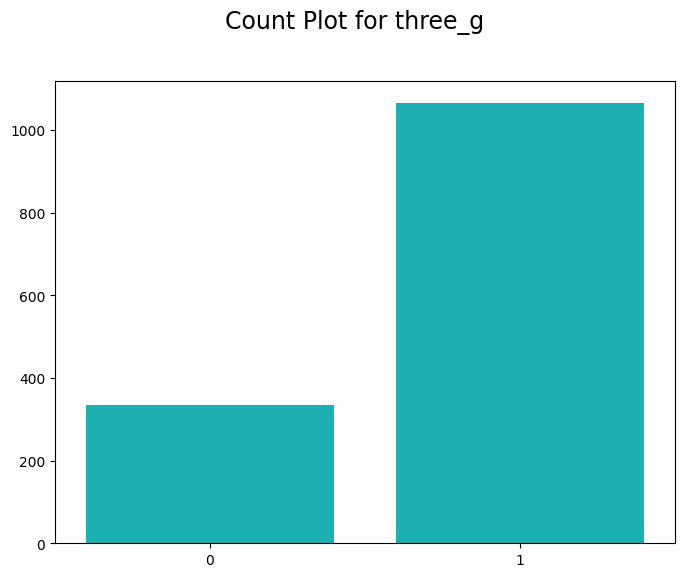

In [417]:
data_non_numerik("three_g")

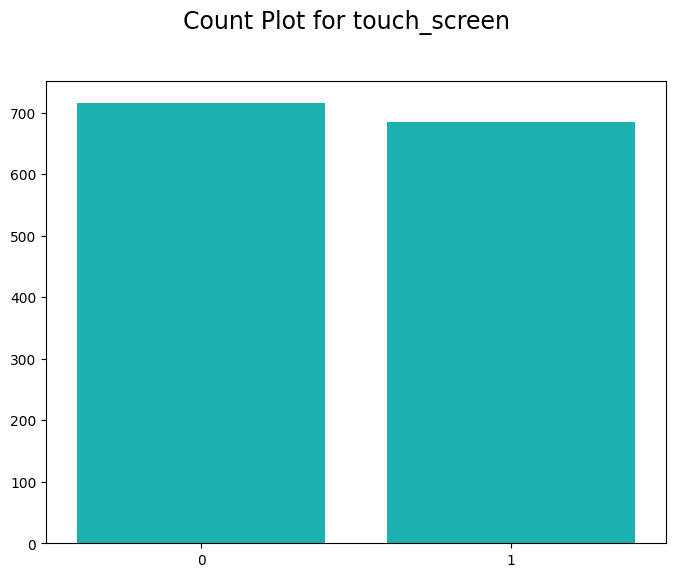

In [418]:
data_non_numerik("touch_screen")

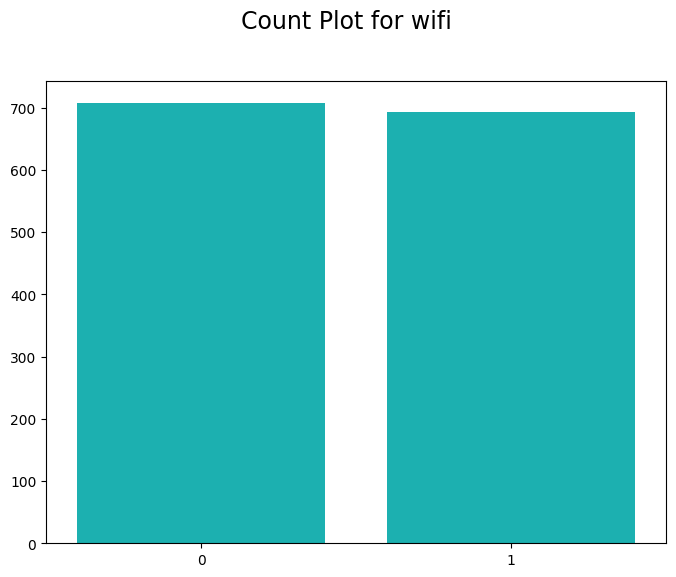

In [419]:
data_non_numerik("wifi")

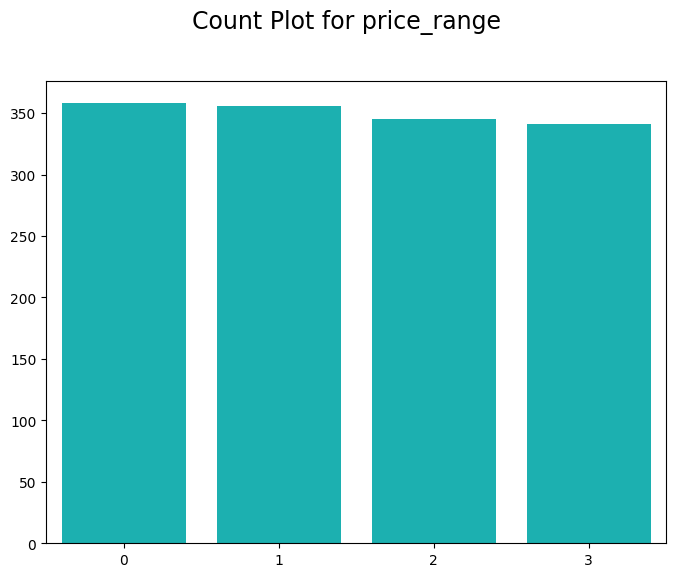

In [420]:
data_non_numerik("price_range")

## Korelasi dengan kolom target
Korelasi adalah suatu konsep dalam statistika yang mengukur sejauh mana dua variabel berkaitan satu sama lain.

In [421]:
def correlation_non_numerik(column) :
    f_val, p_val = st.f_oneway(data_train[column], data_train['price_range'])

    if(p_val<0.05):
        print("Kolom",column,"berpengaruh terhadap price range")
    else:
        print("Kolom",column,"tidak berpengaruh terhadap price range")
    
    if(f_val>1):
        print("Kolom",column,"berkorelasi positif terhadap price range")
    else:
        print("Kolom",column,"berkorelasi negatif terhadap price range")
    

In [422]:
def correlation_numerik(column) :
    corr = data_train[column].corr(data_train['price_range'])
    print("Korelasi antara",column,"dan price range adalah",corr)

    if(abs(corr)>0.5):
        print("Kolom",column,"berpengaruh terhadap price range")
    else:
        print("Kolom",column,"tidak berpengaruh terhadap price range")
    

In [423]:
correlation_numerik("battery_power")

Korelasi antara battery_power dan price range adalah 0.18480092449553084
Kolom battery_power tidak berpengaruh terhadap price range


In [424]:
correlation_non_numerik("blue")

Kolom blue berpengaruh terhadap price range
Kolom blue berkorelasi positif terhadap price range


In [425]:
correlation_numerik("clock_speed")

Korelasi antara clock_speed dan price range adalah 0.014031254818008083
Kolom clock_speed tidak berpengaruh terhadap price range


In [426]:
correlation_non_numerik("dual_sim")

Kolom dual_sim berpengaruh terhadap price range
Kolom dual_sim berkorelasi positif terhadap price range


In [427]:
correlation_numerik("fc")

Korelasi antara fc dan price range adalah -0.003842010298191734
Kolom fc tidak berpengaruh terhadap price range


In [428]:
correlation_numerik("four_g")

Korelasi antara four_g dan price range adalah 0.0005508484718002661
Kolom four_g tidak berpengaruh terhadap price range


In [429]:
correlation_numerik("int_memory")

Korelasi antara int_memory dan price range adalah 0.026175706877841595
Kolom int_memory tidak berpengaruh terhadap price range


In [430]:
correlation_numerik("m_dep")

Korelasi antara m_dep dan price range adalah 0.0012049180209846337
Kolom m_dep tidak berpengaruh terhadap price range


In [431]:
correlation_numerik("m_dep")

Korelasi antara m_dep dan price range adalah 0.0012049180209846337
Kolom m_dep tidak berpengaruh terhadap price range


In [432]:
correlation_numerik("mobile_wt")

Korelasi antara mobile_wt dan price range adalah -0.07476875048323661
Kolom mobile_wt tidak berpengaruh terhadap price range


In [433]:
correlation_numerik("n_cores")

Korelasi antara n_cores dan price range adalah -0.0005823306285452805
Kolom n_cores tidak berpengaruh terhadap price range


In [434]:
correlation_numerik("pc")

Korelasi antara pc dan price range adalah -0.005214430491652989
Kolom pc tidak berpengaruh terhadap price range


In [435]:
correlation_numerik("px_height")

Korelasi antara px_height dan price range adalah 0.15883273548307963
Kolom px_height tidak berpengaruh terhadap price range


In [436]:
correlation_numerik("px_width")

Korelasi antara px_width dan price range adalah 0.1787126901102656
Kolom px_width tidak berpengaruh terhadap price range


In [437]:
correlation_numerik("ram")

Korelasi antara ram dan price range adalah 0.9183192307843839
Kolom ram berpengaruh terhadap price range


In [438]:
correlation_numerik("sc_h")

Korelasi antara sc_h dan price range adalah 0.012148883173074988
Kolom sc_h tidak berpengaruh terhadap price range


In [439]:
correlation_numerik("sc_w")

Korelasi antara sc_w dan price range adalah 0.019911698810365006
Kolom sc_w tidak berpengaruh terhadap price range


In [440]:
correlation_numerik("talk_time")

Korelasi antara talk_time dan price range adalah 0.011112731754754877
Kolom talk_time tidak berpengaruh terhadap price range


In [441]:
correlation_non_numerik("three_g")

Kolom three_g berpengaruh terhadap price range
Kolom three_g berkorelasi positif terhadap price range


In [442]:
correlation_non_numerik("touch_screen")

Kolom touch_screen berpengaruh terhadap price range
Kolom touch_screen berkorelasi positif terhadap price range


In [443]:
correlation_non_numerik("wifi")

Kolom wifi berpengaruh terhadap price range
Kolom wifi berkorelasi positif terhadap price range


In [444]:
correlation_non_numerik("price_range")

Kolom price_range tidak berpengaruh terhadap price range
Kolom price_range berkorelasi negatif terhadap price range
